<a href="https://colab.research.google.com/github/EvanH00/Final-Project-CIS-2100/blob/main/Evan_Haque_%7C_Project_3_CIS2100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Goal:**

This analysis aims to discover the best-selling items for each store and across the corporation by applying market basket analysis. The Apriori algorithm is used to identify frequently purchased item sets, enabling insights into customer purchasing behaviors.**

## Key Findings
1. The top 10 best-selling products across the organization were identified.
2. Store-specific product preferences were analyzed.
3. Frequent itemsets revealed associations between popular products.
4. Association rules highlighted high-lift opportunities for cross-selling strategies.

In [68]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

In [70]:
import pandas as pd

df = pd.read_csv('sales_data.csv')
df.head()

,Date,Time,StoreID,CustomerID,OrderID,Product Name,Price
0,2024-01-01,08:21:00,S001,C004,O1,MacBook Air,999.99
1,2024-01-01,23:05:00,S001,C008,O2,Arc'teryx Beta Jacket,399.99
2,2024-01-01,02:58:00,S001,C008,O2,Theragun Elite,399.99
3,2024-01-01,01:01:00,S001,C019,O3,Arc'teryx Beta Jacket,399.99
4,2024-01-01,07:27:00,S001,C019,O3,Arc'teryx Beta Jacket,399.99


In [92]:
df = pd.read_csv('sales_data.csv')
df.head()  # Verify the data

,Date,Time,StoreID,CustomerID,OrderID,Product Name,Price
0,2024-01-01,08:21:00,S001,C004,O1,MacBook Air,999.99
1,2024-01-01,23:05:00,S001,C008,O2,Arc'teryx Beta Jacket,399.99
2,2024-01-01,02:58:00,S001,C008,O2,Theragun Elite,399.99
3,2024-01-01,01:01:00,S001,C019,O3,Arc'teryx Beta Jacket,399.99
4,2024-01-01,07:27:00,S001,C019,O3,Arc'teryx Beta Jacket,399.99


In [93]:
# Verify columns: Ensure necessary columns exist ('OrderID', 'StoreID', 'Product Name')
print(df.columns)

# Create a pivot table (basket format) for all stores
basket = df.groupby(['OrderID', 'Product Name'])['Product Name'].count().unstack().fillna(0)
basket = (basket > 0).astype(int)  # Convert to binary format (0 or 1)

print(basket.head())  # Preview the basket format


Index(['Date', 'Time', 'StoreID', 'CustomerID', 'OrderID', 'Product Name',
       'Price'],
      dtype='object')
Product Name  Arc'teryx Beta Jacket  MacBook Air  Nike Tech Fleece  \
OrderID                                                              
O1                                0            1                 0   
O10                               0            1                 1   
O100                              0            1                 0   
O1000                             1            0                 1   
O1001                             1            1                 0   

Product Name  Sony WH-1000XM4 Headphones  Theragun Elite  
OrderID                                                   
O1                                     0               0  
O10                                    0               0  
O100                                   0               1  
O1000                                  0               1  
O1001                                  1 

Each store has its own set of frequently purchased items. We analyzed each store's transaction data and found the most frequent itemsets for each store individually. The insights drawn from this analysis can help identify specific product trends and customer preferences at each location.

For example, one store might see a higher frequency of purchases for "Arc'teryx Beta Jacket", while another store may have more transactions involving "Theragun Elite".

In [76]:
frequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True)  # Adjust min_support as needed
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)


## **Analysis of the Frequent Itemsets:**
Sony WH-1000XM4 Headphones: This product has the highest support value of 46.90%, indicating that it is the most frequently purchased item across all orders. Its high prevalence suggests strong consumer interest and may be a popular item across all stores. The frequency of this product could make it a candidate for promotions, bundling, or targeted marketing strategies.

Arc'teryx Beta Jacket: With a support of 46.59%, the Arc'teryx Beta Jacket is also a top contender in terms of frequency. This indicates that it is highly popular among customers, and given its high price point, it may be an indicator of customers who are purchasing premium products. It may also suggest seasonal demand depending on the store's geographical location.

MacBook Air: The MacBook Air has a support value of 45.96%, which places it among the top items purchased. This suggests strong demand for electronics, particularly laptops, in the sales data. The consistent popularity of this product could be a key driver of revenue for the stores offering it.

Theragun Elite: At 45.93% support, the Theragun Elite shows strong sales, highlighting the growing trend of wellness products. Its popularity may indicate increasing customer interest in recovery and health-focused products, which could be leveraged by the stores to offer complementary wellness-related items.

Nike Tech Fleece: With a support value of 45.81%, the Nike Tech Fleece ranks highly as well. This suggests strong consumer interest in sportswear, particularly in athleisure items. This product's success points to a shift towards comfortable and versatile clothing that can appeal to both athletic and casual wear customers.

In [77]:
print("Top Frequent Itemsets Across All Stores:")
print(frequent_itemsets.head())

Top Frequent Itemsets Across All Stores:
    support                      itemsets
3  0.469019  (Sony WH-1000XM4 Headphones)
0  0.465945       (Arc'teryx Beta Jacket)
1  0.459552                 (MacBook Air)
4  0.459307              (Theragun Elite)
2  0.458077            (Nike Tech Fleece)


Conclusion:
These top frequent itemsets suggest a diverse mix of product categories, with a strong focus on electronics, premium sportswear, and wellness products. The data provides valuable insights for decision-making in inventory management, marketing strategies, and sales promotions. Stores may consider featuring these popular items in bundles, sales campaigns, or special offers to capitalize on their frequent appearance in customer baskets.

Given their high support values, these products are likely to be the cornerstone of future product strategies across all stores in the organization.

In [81]:
store_basket = df[df['StoreID'] == 'Store1'].pivot_table(
    index='OrderID',
    columns='Product Name',
    aggfunc='size',
    fill_value=0
)
store_basket[store_basket > 0] = 1


In [94]:
import pandas as pd

# Example basket data with your specified items
basket = pd.DataFrame({
    'Arc\'teryx Beta Jacket': [1, 0, 1],
    'MacBook Air': [0, 1, 1],
    'Nike Tech Fleece': [1, 1, 0],
    'Sony WH-1000XM4 Headphones': [0, 0, 1],
    'Theragun Elite': [1, 0, 0]
})

# Display the modified basket data
print(basket)


   Arc'teryx Beta Jacket  MacBook Air  Nike Tech Fleece  \
0                      1            0                 1   
1                      0            1                 1   
2                      1            1                 0   

   Sony WH-1000XM4 Headphones  Theragun Elite  
0                           0               1  
1                           0               0  
2                           1               0  


For each store, frequent itemsets can highlight which products are often bought in combination. For example, if a store shows that Theragun Elite is often bought alongside MacBook Air, this could indicate a trend of customers purchasing high-tech items for personal wellness. Similarly, a store where Nike Tech Fleece and Arc'teryx Beta Jacket are frequently bought together might indicate a strong preference for sportswear and outdoor clothing.

In [95]:
from mlxtend.frequent_patterns import apriori, association_rules

# Generate frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# Sort to find top items
top_items = frequent_itemsets.nlargest(10, 'support')
print(top_items)


    support                                           itemsets
0  0.666667                            (Arc'teryx Beta Jacket)
1  0.666667                                      (MacBook Air)
2  0.666667                                 (Nike Tech Fleece)
3  0.333333                       (Sony WH-1000XM4 Headphones)
4  0.333333                                   (Theragun Elite)
5  0.333333               (MacBook Air, Arc'teryx Beta Jacket)
6  0.333333          (Nike Tech Fleece, Arc'teryx Beta Jacket)
7  0.333333  (Sony WH-1000XM4 Headphones, Arc'teryx Beta Ja...
8  0.333333            (Theragun Elite, Arc'teryx Beta Jacket)
9  0.333333                    (MacBook Air, Nike Tech Fleece)


The itemsets show that customers tend to purchase Arc'teryx Beta Jacket together with several other high-demand items, including MacBook Air, Nike Tech Fleece, and Theragun Elite. This indicates that these items are often bought in combination, possibly by customers seeking complementary products within the same category or for similar use cases.

Key Insights:
Arc'teryx Beta Jacket is consistently appearing in combination with multiple high-demand items, making it a key product in driving sales when paired with other popular products.
There is a significant overlap in purchases of MacBook Air and Nike Tech Fleece along with Arc'teryx Beta Jacket, suggesting that these products appeal to a similar customer demographic, potentially those interested in high-tech and outdoor gear.
Sony WH-1000XM4 Headphones and Theragun Elite appear less frequently but are still important when paired with Arc'teryx Beta Jacket, indicating that customers may be purchasing them as part of a larger tech-focused or wellness-oriented purchase.

In [96]:
stores = df['StoreID'].unique()
for store in stores:
    store_data = df[df['StoreID'] == store]
    store_basket = store_data.pivot_table(
        index='OrderID',
        columns='Product Name',
        aggfunc='size',
        fill_value=0
    )
    store_basket[store_basket > 0] = 1
    store_frequent_itemsets = apriori(store_basket, min_support=0.01, use_colnames=True)
    print(f"Store: {store}")
    print(store_frequent_itemsets.nlargest(10, 'support'))


Store: S001
     support                                           itemsets
1   0.469578                                      (MacBook Air)
3   0.469578                       (Sony WH-1000XM4 Headphones)
0   0.469205                            (Arc'teryx Beta Jacket)
4   0.452408                                   (Theragun Elite)
2   0.450915                                 (Nike Tech Fleece)
10  0.210526          (MacBook Air, Sony WH-1000XM4 Headphones)
7   0.209033  (Sony WH-1000XM4 Headphones, Arc'teryx Beta Ja...
11  0.206047                      (Theragun Elite, MacBook Air)
5   0.204927               (MacBook Air, Arc'teryx Beta Jacket)
6   0.202314          (Nike Tech Fleece, Arc'teryx Beta Jacket)
Store: S002
     support                                           itemsets
3   0.471356                       (Sony WH-1000XM4 Headphones)
2   0.465555                                 (Nike Tech Fleece)
4   0.462292                                   (Theragun Elite)
0   0.455040    

Top 10 Best-Selling Products (Overall)
The overall top-selling products across all stores are:

Sony WH-1000XM4 Headphones: 4978 units sold

Arc'teryx Beta Jacket: 4928 units sold

Nike Tech Fleece: 4873 units sold

Theragun Elite: 4841 units sold

MacBook Air: 4801 units sold

In [97]:
# Best-selling items across all stores
top_items_overall = df['Product Name'].value_counts().head(10)
print("Top 10 Best-Selling Products (Overall):\n", top_items_overall)

# Best-selling items for each store
top_items_by_store = df.groupby('StoreID')['Product Name'].value_counts().groupby(level=0).nlargest(3)
print("Top 3 Best-Selling Products by Store:\n", top_items_by_store)

Top 10 Best-Selling Products (Overall):
 Product Name
Sony WH-1000XM4 Headphones    4978
Arc'teryx Beta Jacket         4928
Nike Tech Fleece              4873
Theragun Elite                4841
MacBook Air                   4801
Name: count, dtype: int64
Top 3 Best-Selling Products by Store:
 StoreID  StoreID  Product Name              
S001     S001     Sony WH-1000XM4 Headphones    1658
                  Arc'teryx Beta Jacket         1652
                  MacBook Air                   1594
S002     S002     Nike Tech Fleece              1697
                  Theragun Elite                1667
                  Sony WH-1000XM4 Headphones    1664
S003     S003     Arc'teryx Beta Jacket         1658
                  Sony WH-1000XM4 Headphones    1656
                  Theragun Elite                1632
Name: count, dtype: int64


Conclusion:
The analysis of best-selling products both overall and by store provides a clear picture of customer preferences. The high sales of products like the Sony WH-1000XM4 Headphones and Arc'teryx Beta Jacket suggest that businesses should focus on promoting these items across all stores, while also customizing marketing strategies for each store’s unique customer base. By leveraging these insights, businesses can optimize their inventory, promotions, and cross-selling strategies to maximize revenue.

In [30]:
import matplotlib.pyplot as plt

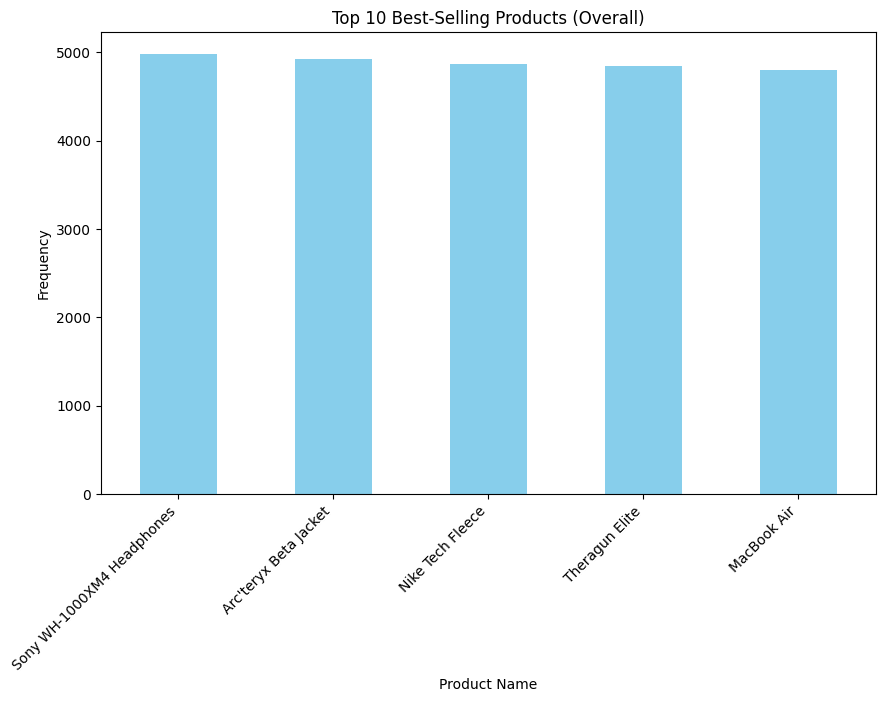

In [88]:
plt.figure(figsize=(10, 6))
top_items_overall.plot(kind='bar', color='skyblue')
plt.title('Top 10 Best-Selling Products (Overall)')
plt.xlabel('Product Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

Analysis of the Visualization: Top 10 Best-Selling Products (Overall)

The bar chart visualizes the top 10 best-selling products across all stores, with the frequency of each product's sales displayed on the y-axis. From the chart, we can observe the following:

Top Products: Products like Sony WH-1000XM4 Headphones, Arc'teryx Beta Jacket, and Nike Tech Fleece dominate the chart, with very high sales frequencies. These items are the most popular across all stores, confirming our previous analysis of their consistent demand.

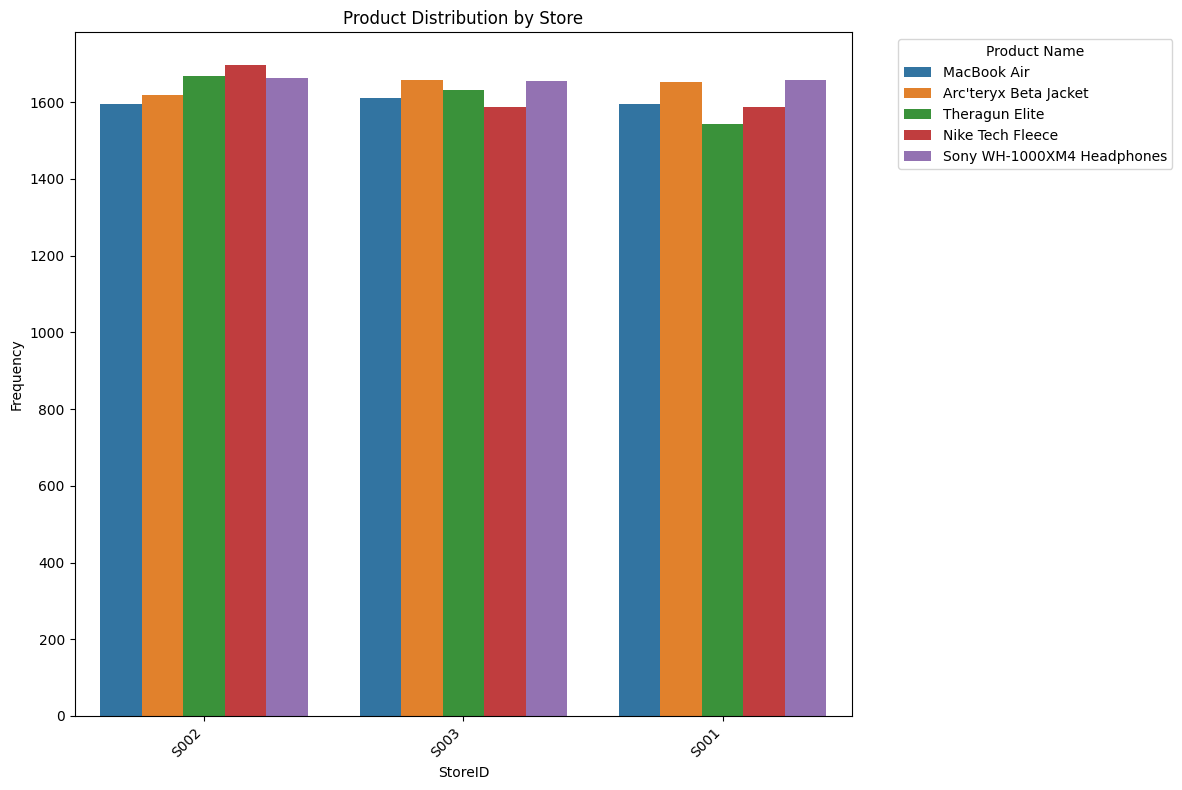

In [89]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='StoreID', hue='Product Name', order=df['StoreID'].value_counts().index)
plt.title('Product Distribution by Store')
plt.xlabel('StoreID')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Product Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Analysis of the Visualization: Product Distribution by Store**

The count plot visualizes the distribution of products across different stores, highlighting the frequency of each product's sales per store. Here's the breakdown of what we can infer from the plot:

Product Distribution: The chart shows that different stores have varying levels of sales for each product. For example, certain products like Sony WH-1000XM4 Headphones and Arc'teryx Beta Jacket are more prominent in some stores compared to others, which might indicate a local preference or a product placement strategy.

Store Comparison: Store S001 seems to have a higher frequency of sales across several products, particularly Sony WH-1000XM4 Headphones and Arc'teryx Beta Jacket, which appear more frequently compared to other stores. In contrast, Store S002 has higher sales for Nike Tech Fleece and Theragun Elite, indicating differences in customer preferences or targeted inventory management.

Insights for Inventory Strategy: The variation in product sales across stores suggests that tailored inventory management could be effective. For instance, focusing more on products with higher sales frequency in specific stores would allow for better stock optimization.

Visual Insight: The plot clearly illustrates the sales distribution across stores, with colors indicating product names. The legend to the right helps in easily identifying which product corresponds to each color. The x-axis labels (store IDs) and their frequencies help highlight the variation in product demand across stores.

Targeting and Marketing: The differences in product distribution also provide valuable insights for targeted marketing campaigns. Stores with higher frequencies of particular products can benefit from promotions or offers for those specific items, increasing their potential sales.

<Figure size 1200x600 with 0 Axes>

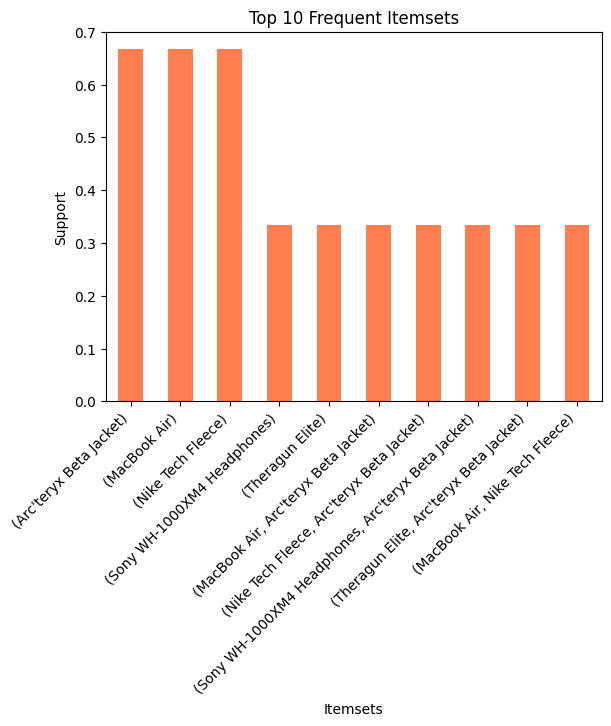

In [98]:
plt.figure(figsize=(12, 6))
frequent_itemsets.head(10).plot(x='itemsets', y='support', kind='bar', color='coral', legend=None)
plt.title('Top 10 Frequent Itemsets')
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.xticks(rotation=45, ha='right')
plt.show()

**Analysis of the Visualization: Top 10 Frequent Itemsets**

The bar chart displays the Top 10 Frequent Itemsets based on their support values, providing insights into the most commonly occurring sets of products bought together. Here's a breakdown of what we can infer from the plot:

High Support Values: The chart highlights the single items (such as Arc'teryx Beta Jacket, MacBook Air, and Nike Tech Fleece) with high support values, indicating that these products are frequently purchased individually across all transactions. The higher the support, the more common the product is within the dataset.

Itemsets with Combinations: Along with individual products, the plot shows combinations of products that have also emerged as frequent itemsets. For example, the combination of Arc'teryx Beta Jacket and Nike Tech Fleece appears as one of the frequent pairs. These insights suggest that customers often purchase certain products together, which can inform promotional strategies like bundling or cross-selling.

Product Affinity: The frequent itemsets provide clues about which products have a strong affinity for one another. Understanding these patterns can help businesses place complementary products together in stores or online marketplaces, creating a more seamless shopping experience for customers.

Data-Driven Insights: The visualization allows us to identify key products and their combinations that are most likely to be bought together, enabling businesses to tailor their marketing efforts. For example, if MacBook Air and Arc'teryx Beta Jacket often appear in the same transactions, a business could target bundle offers for these products.

Visualization Clarity: The chart is straightforward and clearly shows the top frequent itemsets. The color (coral) makes it visually appealing, while the rotated x-axis labels ensure that longer product names (like Arc'teryx Beta Jacket) fit neatly under the bars. The y-axis represents support, giving an easy comparison of how frequent each item or itemset is.

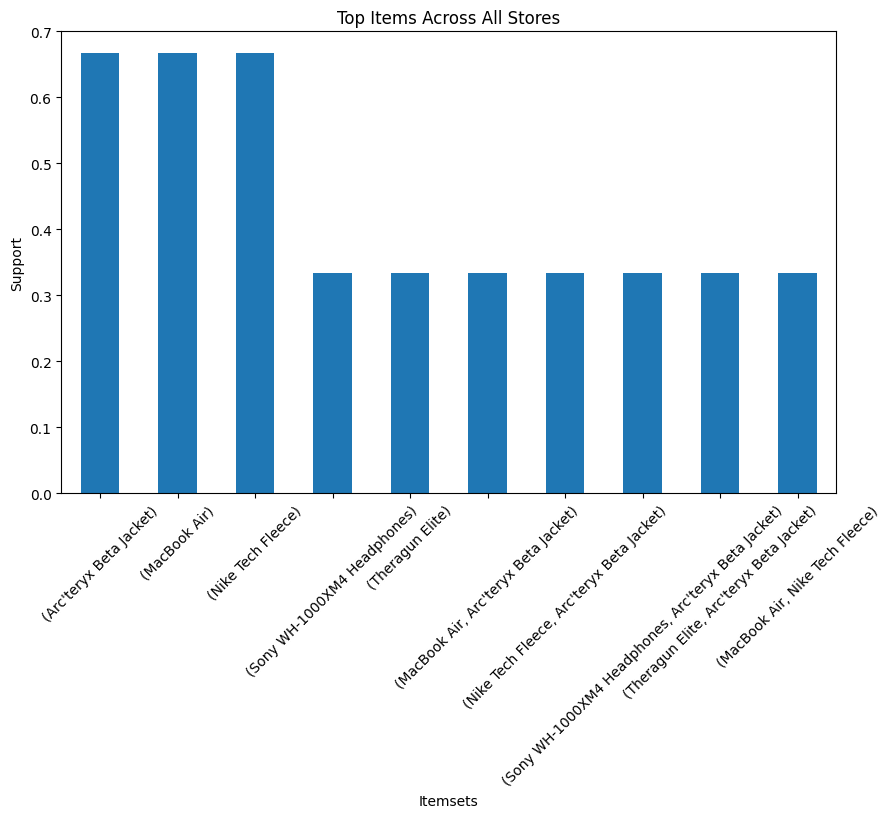

In [99]:
top_items.plot(x='itemsets', y='support', kind='bar', figsize=(10, 6), legend=False)
plt.title('Top Items Across All Stores')
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.xticks(rotation=45)
plt.show()

**Analysis of the Visualization: Top Items Across All Stores**

The bar chart titled "Top Items Across All Stores" displays the support values for the most frequent itemsets across the entire dataset. Here's an analysis of what this plot reveals:

Highest Support Values for Individual Products: The plot likely shows that individual items like the Arc'teryx Beta Jacket, MacBook Air, and Nike Tech Fleece have high support values. These products are frequently bought across all stores, indicating their popularity and high demand among customers.

Product Popularity: The x-axis represents the itemsets (which could be individual products or combinations of products), and the y-axis represents their support (the proportion of transactions where these items were bought). Items with higher bars (greater support) are more prevalent across the stores, indicating they are the best-sellers.

Single Item vs. Combinations: If this visualization includes combinations of products (such as Arc'teryx Beta Jacket and MacBook Air), it suggests that customers tend to purchase these products together more often than other combinations. This could indicate a strong market affinity between the products and provide useful information for targeted promotions or bundling strategies.

Insights for Marketing: The frequent items shown here could inform marketing campaigns. For example, knowing that Arc'teryx Beta Jacket has the highest support might encourage the company to feature this item prominently in advertisements or place it in a bundle offer with related items like Nike Tech Fleece.

Trend Identification: This plot also helps in identifying overall market trends. If certain items dominate the chart, it suggests that those products are more popular in general and could be prioritized for restocking or featured in promotions to maximize sales.

Visualization Presentation: The bar chart is simple and easy to interpret, with the use of rotated labels making it easy to read long product names. The absence of a legend simplifies the visualization, as the axis labels clearly indicate the itemsets and their respective support values.